In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [5]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [6]:
df.shape

(2224, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [8]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [9]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [10]:
from pandas import DataFrame

In [11]:
df["date_index"]=df["Date_month_year"] + " " + df["Time"]

In [12]:
df["date_index"].head()

0     22-Apr-15 3:53:50 PM
1    04-Aug-15 10:22:56 AM
2     18-Apr-15 9:55:47 AM
3    05-Jul-15 11:59:35 AM
4     26-May-15 1:25:26 PM
Name: date_index, dtype: object

In [13]:
#Converting Date_Index and Date_Month_Year columns to datetime object
df["date_index"]=pd.to_datetime(df["date_index"])
df["Date_month_year"]=pd.to_datetime(df["Date_month_year"])

In [14]:
# Confirming the changes
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [15]:
# setting index to date_index

df=df.set_index(df["date_index"])

In [16]:
# Checking number of complain received datewise

df["Date_month_year"].value_counts() 

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-17      7
2015-12-05      7
2015-05-04      6
2015-11-04      5
2015-03-05      5
Name: Date_month_year, Length: 91, dtype: int64

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:>

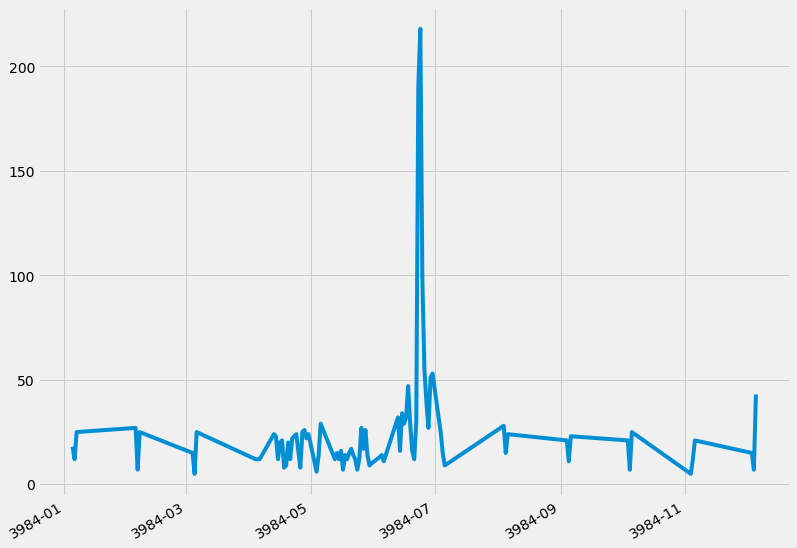

In [17]:
plt.style.use('fivethirtyeight')

df["Date_month_year"].value_counts().plot(figsize=(12,10))

In [18]:
df['Month'] = pd.DatetimeIndex(df['Date_month_year']).month

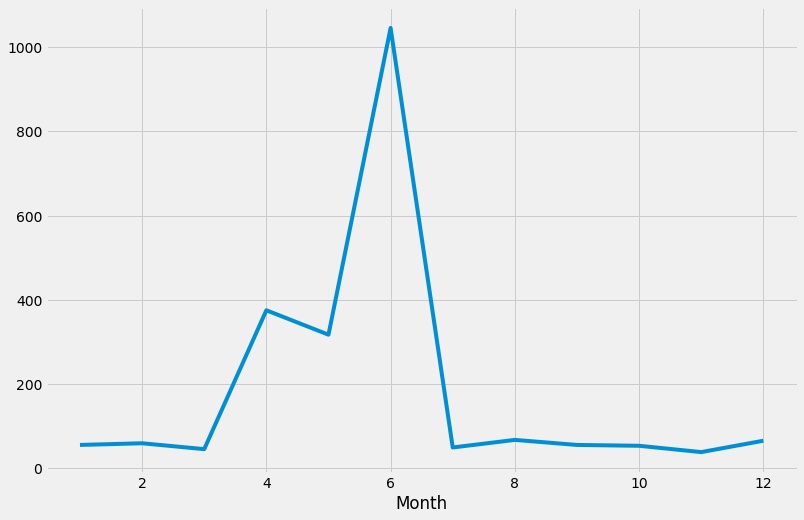

In [19]:
df.groupby('Month').size().plot(figsize=(12,8));

In [20]:
# importing necessary libraries for NLP and Topic Modeling

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string 
import gensim
from gensim import corpora
from gensim.models import LdaModel

In [21]:
# Generating wordcloud by removing stopwords and extracting key words which may defines the Customer complains

txt=df["Customer Complaint"].values
wc=WordCloud(width=250, height=125, background_color="black", stopwords=STOPWORDS).generate(str(txt))

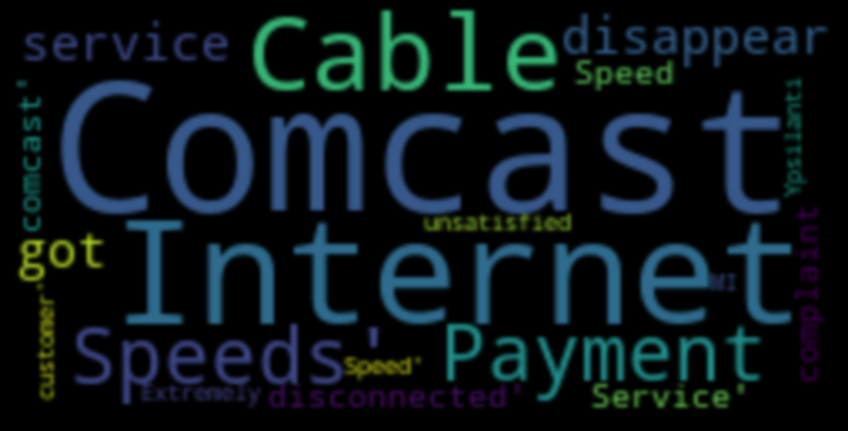

In [22]:
fig=plt.figure(figsize=(12,8), facecolor='k', edgecolor='w')
plt.imshow(wc, interpolation="bicubic")
plt.axis("off")
plt.tight_layout()
plt.show()

In [23]:
# Assigning stopwords, punctuations and initiating the stemming Lemmatixer

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [24]:
# Defining a function to perform cleaning of the customer complains with stopwords, punctuations and stemming. 

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [25]:
# Cleaning the complains and performing tokenization

doc_complete = df["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]
dictionary = corpora.Dictionary(doc_clean)


In [26]:
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [27]:
# creating a bag of words corpus by passing tokenized list of words to the Dictionary

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [28]:
NUM_TOPICS = 9

In [29]:
# Training the LDA model on the dictionary of tokenized word we created

ldamodel = LdaModel(doc_term_matrix, num_topics=NUM_TOPICS, id2word=dictionary, passes=30)


In [32]:
# Now getting a list of representation for selected topics containing Word - probability pairs for the most
# relevant words generated by the topic.

topics = ldamodel.show_topics()


In [33]:
# Iterating through the list 

for topic in topics:
    print(topic)
    print("\n")

(0, '0.098*"practice" + 0.091*"billing" + 0.076*"unfair" + 0.071*"comcast" + 0.058*"pricing" + 0.034*"deceptive" + 0.032*"monopolistic" + 0.025*"connectivity" + 0.020*"modem" + 0.020*"intermittent"')


(1, '0.137*"billing" + 0.125*"comcast" + 0.101*"service" + 0.065*"issue" + 0.057*"customer" + 0.016*"help" + 0.015*"failure" + 0.014*"account" + 0.012*"month" + 0.011*"bill"')


(2, '0.155*"comcast" + 0.063*"complaint" + 0.048*"service" + 0.042*"bill" + 0.029*"cable" + 0.023*"price" + 0.023*"without" + 0.016*"paying" + 0.013*"pay" + 0.013*"high"')


(3, '0.260*"comcast" + 0.069*"internet" + 0.058*"charge" + 0.036*"throttling" + 0.016*"contract" + 0.014*"overage" + 0.013*"fee" + 0.013*"limit" + 0.011*"price" + 0.010*"3"')


(4, '0.119*"xfinity" + 0.064*"comcast" + 0.056*"false" + 0.034*"switch" + 0.026*"advertising" + 0.024*"get" + 0.023*"bait" + 0.023*"issue" + 0.019*"home" + 0.016*"claim"')


(5, '0.038*"fee" + 0.034*"year" + 0.032*"monthly" + 0.029*"installation" + 0.026*"xfinitycomcas

In [34]:
# Getting the 20 most significant words associated with customer complains with their probability

word_dictionary = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dictionary["Topic # " + "{}".format(i+1)] = [i[0] for i in words]

In [35]:
ldamodel.show_topic(1, topn = 20)

[('billing', 0.13738705),
 ('comcast', 0.1249143),
 ('service', 0.1008402),
 ('issue', 0.06480321),
 ('customer', 0.057243817),
 ('help', 0.016344769),
 ('failure', 0.015220151),
 ('account', 0.014095909),
 ('month', 0.0124626355),
 ('bill', 0.011112989),
 ('2', 0.0100953095),
 ('bad', 0.009547483),
 ('horrible', 0.009168544),
 ('back', 0.009155738),
 ('please', 0.009155686),
 ('provide', 0.00878933),
 ('cancelling', 0.008397662),
 ('credit', 0.0080332495),
 ('charge', 0.0067218016),
 ('still', 0.006515218)]

In [36]:
pd.DataFrame(word_dictionary)

,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8,Topic # 9
0,practice,billing,comcast,comcast,xfinity,fee,service,internet,data
1,billing,comcast,complaint,internet,comcast,year,internet,speed,cap
2,unfair,service,service,charge,false,monthly,comcast,comcast,comcast
3,comcast,issue,bill,throttling,switch,installation,slow,problem,usage
4,pricing,customer,cable,contract,advertising,xfinitycomcast,poor,comcastxfinity,charged
5,deceptive,help,price,overage,get,increased,connection,outage,incorrect
6,monopolistic,failure,without,fee,bait,lack,billed,fraudulent,throttled
7,connectivity,account,paying,limit,issue,tucson,day,promised,plan
8,modem,month,pay,price,home,bill,equipment,monopoly,fee
9,intermittent,bill,high,3,claim,scam,email,slowing,internet


In [38]:
ldamodel.show_topic(0, topn=20)

[('practice', 0.09785332),
 ('billing', 0.090896),
 ('unfair', 0.07648801),
 ('comcast', 0.07105791),
 ('pricing', 0.05771494),
 ('deceptive', 0.034427136),
 ('monopolistic', 0.032461133),
 ('connectivity', 0.02470438),
 ('modem', 0.020213056),
 ('intermittent', 0.019542767),
 ('option', 0.015005222),
 ('lied', 0.014380001),
 ('one', 0.013731806),
 ('regarding', 0.011787449),
 ('sale', 0.011269997),
 ('misleading', 0.0106602395),
 ('returned', 0.009843551),
 ('consumer', 0.009842619),
 ('install', 0.00919528),
 ('sold', 0.00854599)]

In [39]:
# pyLDAvis is a Python library for interactive topic model visualization and its being used
# to extracts information from our fitted LDA topic model and to have a interactive web-based visualization.

import pyLDAvis.gensim

In [40]:
Lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(Lda_display)

In [41]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [42]:
df["NewStatus"]=["Open" if(status=="Open" or status=="Pending") else "Closed" for status in df["Status"]]

In [43]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Month,NewStatus
date_index,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,4,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,8,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,4,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,7,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,5,Closed


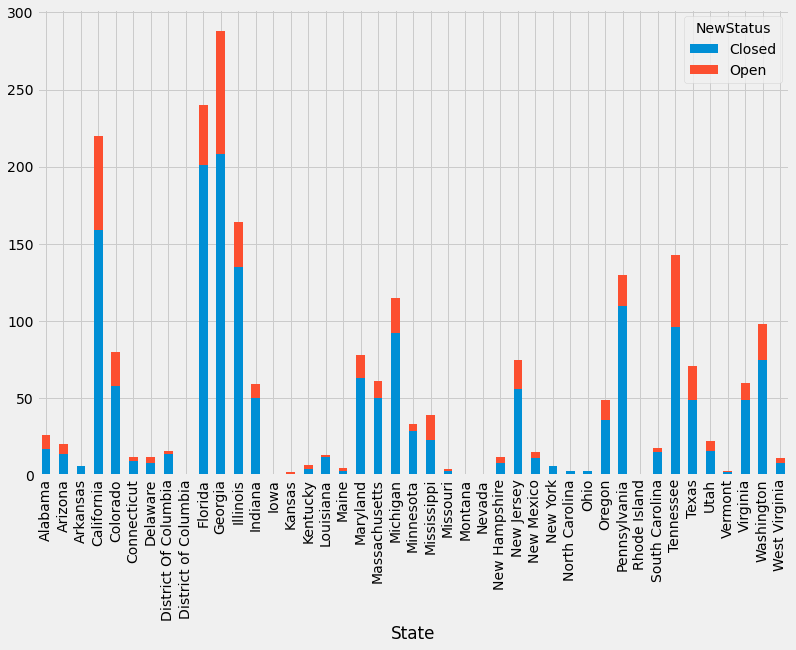

In [44]:
plt.style.use('fivethirtyeight')

df.groupby(["State", "NewStatus"]).size().unstack().fillna(0).plot(kind="bar",figsize=(12,8), stacked=True);

In [45]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Count"},axis=1)[0:10]

,Count
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


In [46]:
grp_df=df.groupby(["State", "NewStatus"]).size().unstack().fillna(0)

In [48]:
grp_df["TotalTickets"] = grp_df["Closed"] + grp_df["Open"]
grp_df["OpenTicketPerc"] = 100*(grp_df["Open"]/grp_df["TotalTickets"])

In [49]:
grp_df.head()

NewStatus,Closed,Open,TotalTickets,OpenTicketPerc
State,,,,
Alabama,17.0,9.0,26.0,34.615385
Arizona,14.0,6.0,20.0,30.000000
Arkansas,6.0,0.0,6.0,0.000000
California,159.0,61.0,220.0,27.727273
Colorado,58.0,22.0,80.0,27.500000


In [56]:
grp_df["OpenTicketPerc"].sort_values(ascending=False).to_frame().head()

,OpenTicketPerc
State,
Kansas,50.000000
Kentucky,42.857143
Mississippi,41.025641
Maine,40.000000
Alabama,34.615385


In [51]:
df["Received Via"].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [52]:
grp_status=df.groupby(["Received Via","NewStatus"]).size().unstack().fillna(0)


In [54]:
grp_status["TotalTickets"] = grp_status["Closed"] + grp_status["Open"]
grp_status["ClosedTicketPerc"] = 100*(grp_status["Closed"]/grp_status["TotalTickets"])

In [55]:
grp_status["ClosedTicketPerc"].sort_values(ascending=False).to_frame().head()

,ClosedTicketPerc
Received Via,
Customer Care Call,77.211796
Internet,76.289593
